# Linear Regression
<li>Linear regression is a statistical practice of calculating a straight line that specifies a mathematical relationship between two variables.</li>
<li>Linear regression analysis is used to predict the value of a variable based on the value of another variable.</li>
<li>The variable you want to predict is called the dependent variable.</li>
<li>The variable you are using to predict the other variable's value is called the independent variable.</li>

<ol>
    <li>Simple Linear Regression</li>
    <li>Multiple Linear Regression</li>
</ol>

## 1. Simple Linear Regression
<li>Simple linear regression is a regression model that estimates the relationship between one independent and one dependent variable using a straight line.</li>
<li>Both variables should be quantitative.</li>

<li>The following equation is the general form of the simple linear regression model.</li>
<code>
    ^
    y =B0 + B1x1 
</code>
Where    
^
y represents the predicted value, 
x1 represents the feature column we choose to use in our model.
<li>These values are independent of the dataset.</li>
<li>On the other hand, B0 and B1 represent the parameter values that are specific to the dataset.</li>
<li>The goal of simple linear regression is to find the optimal B0 and B1 values that best describe the relationship between the feature and the target column.</li>


<li>The following diagram shows different simple linear regression models depending on the data:</li>

![](images/regression_figure.png)

<li>The first step is to select the feature x1, we want to use in our model.</li>
<li>Once we select this feature, we can use scikit-learn to determine the optimal parameter values B0 and B1 based on the training data.</li>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('csv_data/advertising.csv')
df.shape

(200, 4)

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<AxesSubplot: xlabel='TV', ylabel='Density'>

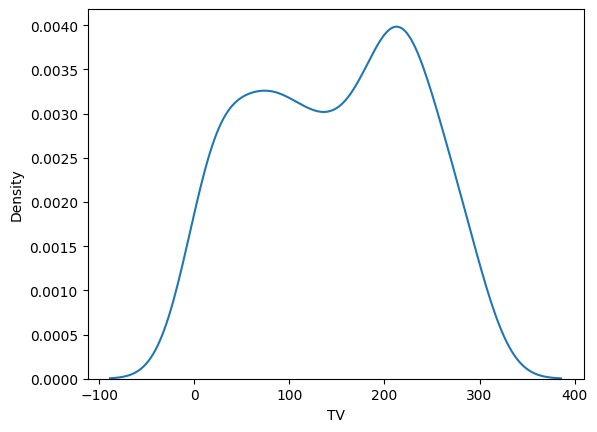

In [4]:
sns.kdeplot(df['TV'])

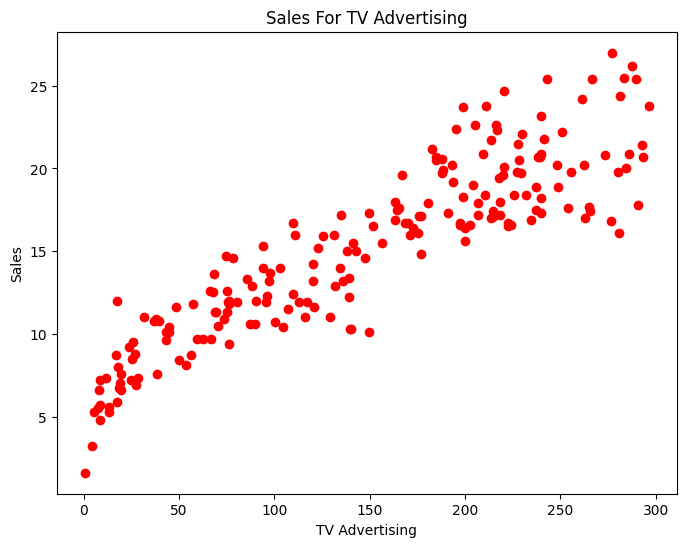

In [5]:
plt.figure(figsize = (8, 6))
plt.scatter(x = df['TV'], y = df['Sales'], color = 'red')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Sales For TV Advertising')
plt.show()

In [6]:
X = df[['TV']]
y = df['Sales']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
X_train.shape

(160, 1)

In [10]:
y_train.shape

(160,)

In [11]:
X_test.shape

(40, 1)

In [12]:
y_test.shape

(40,)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr.coef_

array([0.05548294])

In [17]:
lr.intercept_

7.007108428241848

In [18]:
y_pred = lr.predict(X_test)
print(y_pred)

[16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191  8.75482116 10.12524988
 20.01785878  7.30671633 14.74697911 16.45030549  7.41213392 17.97053815
 11.18497411 20.17875932 19.74044406 10.76885203  9.1154603  20.92777906
 10.83543156  9.97544593 18.85271696 14.73588252 11.84522114  7.47316516
 18.09260063 10.84652815 18.04266598  7.94477018 22.58117079 20.22314567
  9.68693462 22.19279018 13.50970946  8.53288939]


In [19]:
test_vs_pred_df = pd.DataFrame({'Actual': list(y_test), 'Prediction': y_pred})
test_vs_pred_df.head()

,Actual,Prediction
0,16.9,16.067473
1,22.4,17.848476
2,21.4,23.258063
3,7.3,7.656259
4,24.7,19.230001


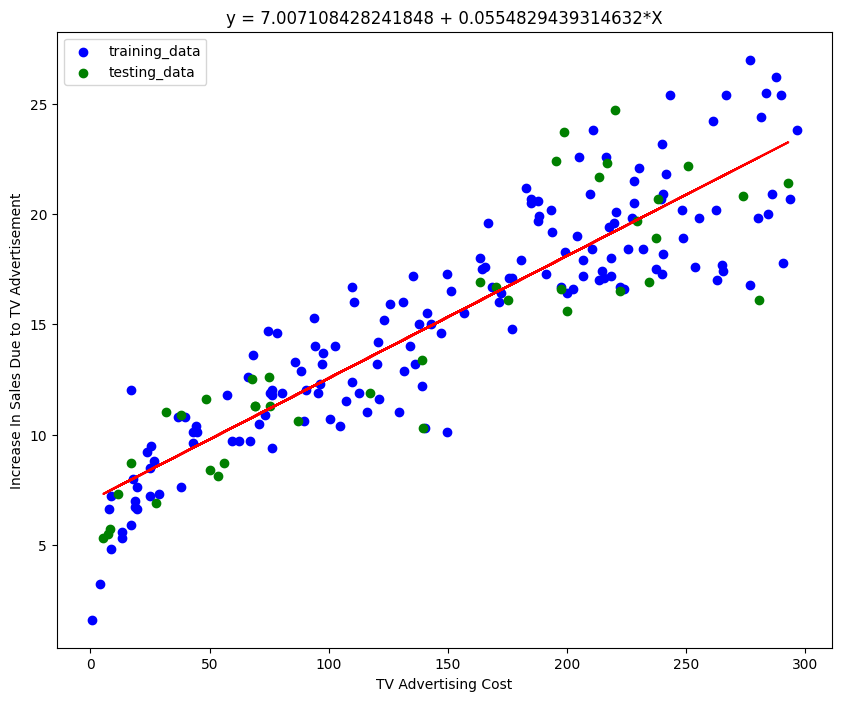

In [20]:
plt.figure(figsize = (10, 8))
plt.scatter(x = X_train, y = y_train, color = 'blue', label = 'training_data')
plt.scatter(x = X_test, y = y_test, color = 'green', label = 'testing_data')
plt.plot(X_test, y_pred, color = 'red')
plt.title("y = {} + {}*X".format(lr.intercept_, lr.coef_[0]))
plt.xlabel('TV Advertising Cost')
plt.ylabel("Increase In Sales Due to TV Advertisement")
plt.legend()
plt.show()

## Cost/Loss Function For Linear Regression

<li>Cost function measures the performance of a machine learning model for a data set.</li>
<li>Cost function quantifies the error between predicted and expected values and presents that error in the form of a single real number.</li>
<li>Depending on the problem, cost function can be formed in many different ways.</li>
<li>The purpose of cost function is to be either minimized or maximized.</li>
<li>For algorithms relying on gradient descent to optimize model parameters, every function has to be differentiable.</li>

![](images/cost_function.png)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
def mse(y_act, y_pred):
    return np.mean((y_pred - y_act)**2)

In [24]:
def mae(y_act, y_pred):
    return np.mean(abs(y_pred - y_act))

In [46]:
def rmse(y_act, y_pred):
    return np.sqrt(np.mean((y_pred - y_act) **2))

In [40]:
mse(y_act = y_test, y_pred = y_pred)

6.101072906773963

In [41]:
mean_squared_error(y_pred, y_test)

6.101072906773963

In [42]:
mae(y_act = y_test, y_pred = y_pred)

1.9502948931650088

In [43]:
mean_absolute_error(y_pred, y_test)

1.9502948931650088

In [47]:
rmse(y_act = y_test, y_pred = y_pred)

2.470035001123256

In [34]:
mean_squared_error(y_pred, y_test, squared = False)

2.470035001123256

In [45]:
np.sqrt(6.101072906773963)

2.470035001123256

### Optimization (Using Gradient Descent)
<li>Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.</li>

![](images/gradient_descent.jpg)


#### Steps For Finding Gradient Descent

![](images/gradient_descent_steps.png)

## Multiple Linear Regression

<li>A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column.</li>
<li>Here's what the formula looks like:
<code>
^
y = B0 + B1x1 + B2x2 + ... + Bnxn
</code>
      ^
<li>Where y represents the predicted value</li>
<li>B0, B1, B2,..., Bn represents n parameter values that are specific to the dataset.</li>
<li>The goal here is to find out the optimal values of B0, B1, B2 such that these features best represents the relationship between the data.</li>

![](images/multiple_linear_regression.png)

<li>The parameters values can be estimated using the following eqns:</li>

![](images/mle_eqn.png)

In [49]:
data = df[['TV', 'Radio']]
labels = df['Sales']

In [50]:
data.shape

(200, 2)

In [51]:
labels.shape

(200,)

In [52]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state = 42)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 2)
(50, 2)
(150,)
(50,)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(x_train, y_train)

LinearRegression()

In [63]:
lr.intercept_

4.8193142960357385

In [64]:
lr.coef_

array([0.05461317, 0.10204696])

In [65]:
y_pred = lr.predict(x_test)
y_pred

array([16.96232854, 20.35836726, 23.70344018,  9.2238211 , 21.85089619,
       12.49240675, 21.13931062,  8.73371742, 17.31224257, 16.67813661,
        9.04998426,  8.47024201, 17.97306191,  8.16542944, 12.65214988,
       14.9104418 ,  8.08550994, 17.98857046, 11.00323911, 20.59077178,
       20.64915314, 12.25700576, 11.00710709, 22.24647217,  9.53665961,
        7.94521271, 20.8672449 , 13.90660952, 10.78573667,  8.05374216,
       15.9963474 , 10.69050817, 20.72299317, 10.20172889, 21.56768334,
       21.32838162, 12.25333734, 22.71609552, 12.72006789,  6.48445156,
       11.94020339, 15.43488178,  9.89779562,  9.50750635, 17.29757668,
        7.28311107, 10.3077553 , 15.30275627, 11.11351935, 11.79259037])

In [66]:
mean_squared_error(y_pred, y_test)

2.356396290987084

In [68]:
np.sqrt(mean_squared_error(y_pred, y_test))

1.535055794095799

In [69]:
mean_absolute_error(y_pred, y_test)

1.1144571493849897

In [71]:
x_train

,TV,Radio
114,78.2,46.8
173,168.4,7.1
5,8.7,48.9
126,7.8,38.9
117,76.4,0.8
...,...,...
106,25.0,11.0
14,204.1,32.9
92,217.7,33.5
179,165.6,10.0


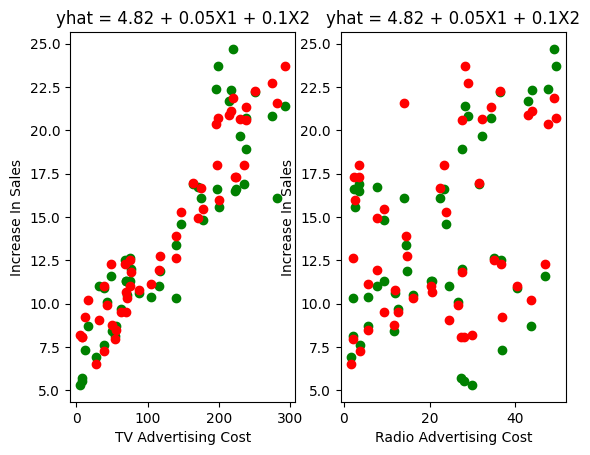

In [84]:


plt.subplot(1, 2, 1)
plt.scatter(x_test['TV'], y_test, color = 'green')
plt.scatter(x_test['TV'], y_pred, color = 'red')
plt.title("yhat = {} + {}X1 + {}X2".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1], 2)))
plt.xlabel("TV Advertising Cost")
plt.ylabel("Increase In Sales")

#plot 2:
plt.subplot(1, 2, 2)
plt.scatter(x_test['Radio'], y_test, color = 'green')
plt.scatter(x_test['Radio'], y_pred, color = 'red')
plt.title("yhat = {} + {}X1 + {}X2".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1], 2)))
plt.xlabel("Radio Advertising Cost")
plt.ylabel("Increase In Sales")

plt.show()

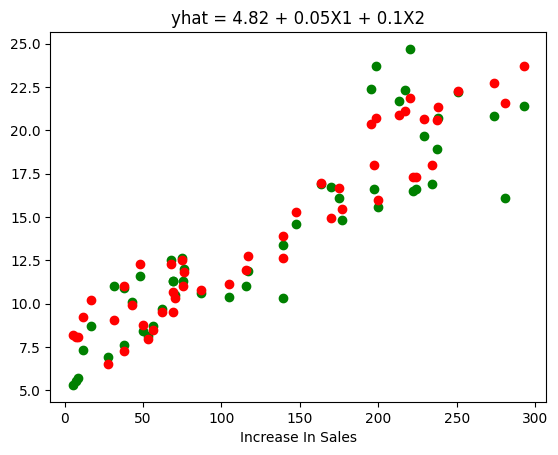

In [81]:
plt.scatter(x_test['TV'], y_test, color = 'green')
plt.scatter(x_test['TV'], y_pred, color = 'red')
plt.title("yhat = {} + {}X1 + {}X2".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1], 2)))
plt.xlabel("TV Advertising Cost")
plt.xlabel("Increase In Sales")
plt.show()

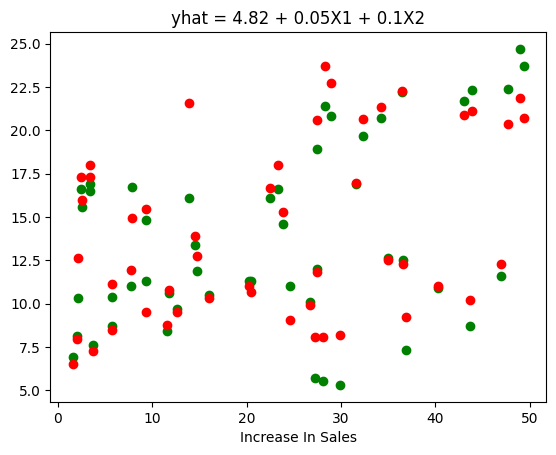

In [82]:
plt.scatter(x_test['Radio'], y_test, color = 'green')
plt.scatter(x_test['Radio'], y_pred, color = 'red')
plt.title("yhat = {} + {}X1 + {}X2".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1], 2)))
plt.xlabel("Radio Advertising Cost")
plt.xlabel("Increase In Sales")
plt.show()

In [86]:
data = df.drop('Sales', axis = 1)
labels = df['Sales']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state = 42)

In [102]:
lr = LinearRegression()

In [103]:
lr.fit(x_train, y_train)

LinearRegression()

In [108]:
lr.intercept_

4.741842244124564

In [109]:
lr.coef_

array([0.05461383, 0.09975946, 0.00430495])

In [104]:
y_pred = lr.predict(x_test)
y_pred

array([17.04041233, 20.39964377, 23.74740099,  9.25653209, 21.67525948,
       12.56179334, 21.07865662,  8.70895483, 17.28353601, 16.68491851,
        8.92573172,  8.50762572, 18.2530284 ,  8.06003145, 12.68447869,
       14.96677492,  8.12198913, 17.91906169, 11.01929198, 20.4979062 ,
       20.81737524, 12.58662099, 10.88870324, 22.39692163,  9.44183427,
        7.95532725, 20.83706013, 13.83997207, 10.79282849,  7.92309626,
       16.00432589, 10.64496918, 20.79094843, 10.40916722, 21.61788525,
       21.1954234 , 12.10497731, 22.82970275, 12.63229447,  6.49245031,
       11.94463925, 15.3638056 ,  9.91037996,  9.48003396, 17.28192106,
        7.25660905, 10.36937236, 15.25293577, 11.17116856, 11.72114226])

In [105]:
mean_squared_error(y_pred, y_test)

2.4040674447118864

In [106]:
mean_absolute_error(y_pred, y_test)

1.1199940713361767

In [107]:
np.sqrt(mean_squared_error(y_pred, y_test))

1.550505544882664

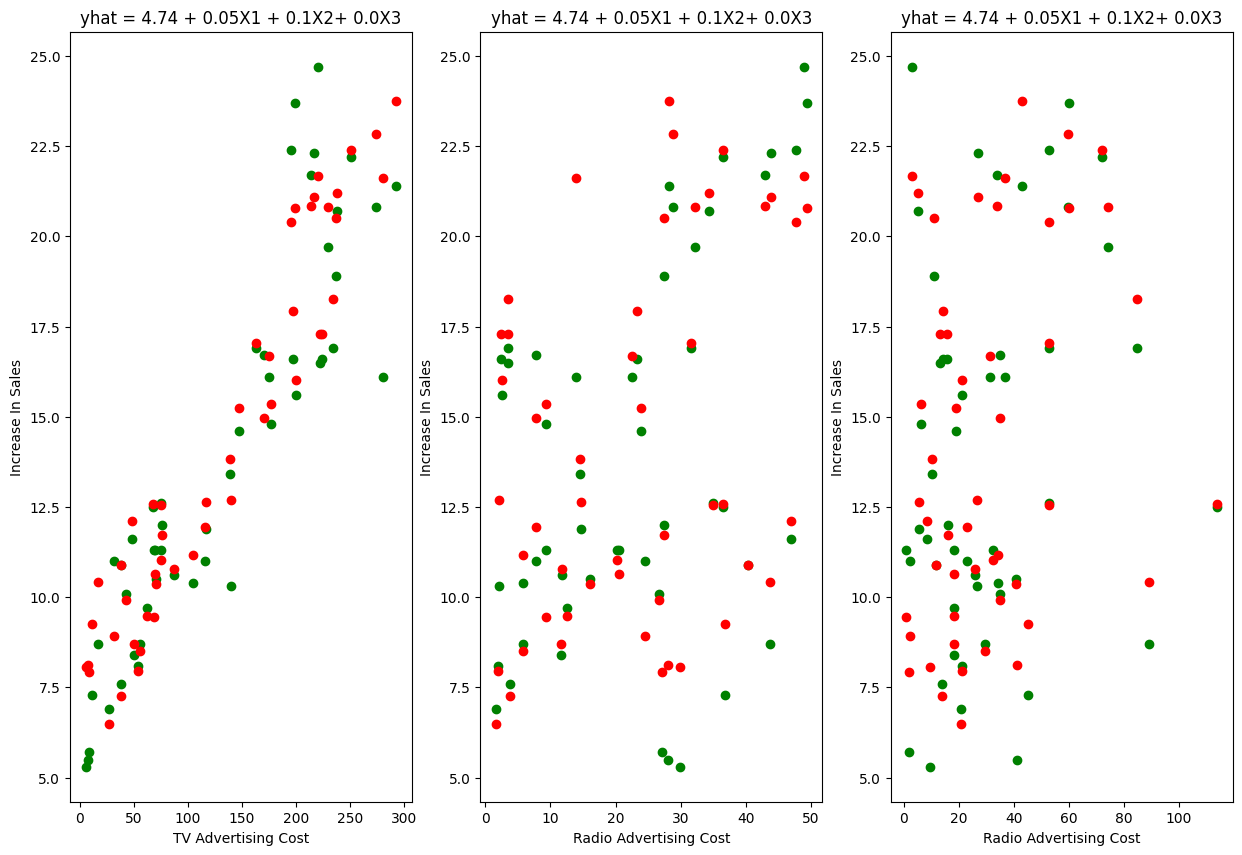

In [115]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
plt.scatter(x_test['TV'], y_test, color = 'green')
plt.scatter(x_test['TV'], y_pred, color = 'red')
plt.title("yhat = {} + {}X1 + {}X2+ {}X3".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1], 2),
                                           round(lr.coef_[2], 2)))
plt.xlabel("TV Advertising Cost")
plt.ylabel("Increase In Sales")

#plot 2:
plt.subplot(1, 3, 2)
plt.scatter(x_test['Radio'], y_test, color = 'green')
plt.scatter(x_test['Radio'], y_pred, color = 'red')
plt.title("yhat = {} + {}X1 + {}X2+ {}X3".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1], 2),
                                           round(lr.coef_[2], 2)))
plt.xlabel("Radio Advertising Cost")
plt.ylabel("Increase In Sales")

#plot 3:
plt.subplot(1, 3, 3)
plt.scatter(x_test['Newspaper'], y_test, color = 'green')
plt.scatter(x_test['Newspaper'], y_pred, color = 'red')
plt.title("yhat = {} + {}X1 + {}X2+ {}X3".format(round(lr.intercept_,2),
                                           round(lr.coef_[0],2),
                                           round(lr.coef_[1], 2),
                                           round(lr.coef_[2], 2)))
plt.xlabel("Radio Advertising Cost")
plt.ylabel("Increase In Sales")

plt.show()

### Performance Metrics In Linear Regression

<li>Mean Absolute Error</li>
<li>Mean Squared Error</li>
<li>Root Mean Squared Error</li>
<li>R2</li>
<li>Adjuster R2</li>

## Assumptions For Linear Regression
<ol>
<li><b>Linearity:</b> The relationship between the dependent variable and the independent variable(s) is linear.</li>
<li><b>Normality:</b>The errors follow a normal distribution.</li>
<li><b>No Multicollinearity:</b>The independent variables are not highly correlated with each other.</li>
<li><b>Independence:</b>The observations are independent of each other.</li>
<li><b>Homoesedasticity:</b> The variance of the errors is constant across all levels of the independent variable(s).</li>
</ol>

### 1. Linearity
<li>Linearity means that there should be a linear relationship between the independent variable(s) and the dependent variable.</li>
<li>Tthe change in the dependent variable should be proportional to the change in the independent variable(s), with a constant slope and intercept.</li>

**Example 1:**

<li>For example, let's say you want to use linear regression to model the relationship between a person's height and their weight.</li>
<li>If the relationship between height and weight is not linear, this would violate the assumption of linearity.</li>
<li>In this case, the model may not be able to accurately capture the complex and nonlinear effects of height on weight.</li>
<li>It may yield biased and inefficient estimates of the regression coefficients.</li>

**Example 2:**

<li>If you were studying the relationship between a company's sales revenue and its advertising budget.</li>
<li>If the relationship between sales revenue and advertising budget is not linear, this would violate the assumption of linearity.</li>
<li>In this case, the model may not be able to capture the diminishing or increasing returns to scale of the advertising budget on sales revenue.</li>
<li>And it may yield unreliable and inaccurate predictions of the sales revenue for different levels of advertising budget.</li>

**Conclusion**
<li>Violation of the linearity assumption can lead to biased and inefficient estimates of the regression coefficients, and can affect the validity of the model.</li> 
<li>Therefore, it is important to check for linearity when using linear regression.</li>
<li>For example, by plotting the dependent variable against each independent variable and examining the scatter plot or trend line.</li>


### 2. Normality:
<li>Normality is one of the assumptions of linear regression, which means that the errors (residuals) should follow a normal distribution.</li>
<li>In other words, the distribution of the residuals should be symmetrical and bell-shaped around zero.</li>

**Example 1:**
<li>For example, let's say you want to use linear regression to model the relationship between a person's age and their cholesterol level.</li>
<li>If the distribution of the residuals is skewed or has outliers, this would violate the assumption of normality.</li>
<li>In this case, the model may be overestimating or underestimating the effect of age on cholesterol level.</li>

**Example 2:**
<li>Another example would be if you were studying the relationship between a company's advertising budget and its sales revenue.</li>
<li>If the distribution of the residuals is not normal, this would violate the assumption of normality.</li>
<li>In this case, the model may not accurately capture the nonlinearities and interactions between the variables.</li>
<li>And as a result, the estimated confidence intervals and p-values may be inaccurate.</li>

**Conclusion**

<li>Violation of the normality assumption can lead to biased and inefficient estimates of the regression coefficients.</li> <li>It can also affect the validity of the statistical inferences and predictions based on the model.</li>
<li>Therefore, it is important to check for normality when using linear regression.</li>
<li>For example, by examining the histogram, Q-Q plot, or normal probability plot of the residuals, we can check normality.</li>

### 3. No multicollinearity

<li>No multicollinearity is one of the assumptions of linear regression, which means that the independent variables should not be highly correlated with each other.</li>
<li>In other words, there should be no perfect or near-perfect linear relationship between any two or more independent variables.</li>

**Example 1:**

<li>To model the relationship between a student's exam scores and their study time, their attendance rate, and their participation in a review session.</li>
<li>If study time and attendance rate are highly correlated with each other, this would violate the assumption of no multicollinearity.</li>
<li>In this case, the model may not be able to distinguish between the effects of study time and attendance rate on the exam scores.</li> 
<li>And as a result, the estimated regression coefficients and their standard errors may be unstable or even impossible to calculate.</li>

**Example2:**

<li>Another example would be if you were studying the relationship between a car's fuel efficiency and its engine size, weight, and horsepower.</li>
<li>If engine size and horsepower are highly correlated with each other, this would violate the assumption of no multicollinearity.</li>
<li>In this case, the model may not be able to separate the effects of engine size and horsepower on fuel efficiency.</li>
<li>And as a result, the estimated regression coefficients and their standard errors may be unreliable or even misleading.</li>

**Conlusion**

<li>Violation of the no multicollinearity assumption can lead to unstable and inaccurate estimates of the regression coefficients.</li>
<li>And as a result, it can affect the interpretation and prediction of the model.</li>
<li>Therefore, it is important to check for multicollinearity when using linear regression.</li>

<li>If the VIF values are greater than 5 or 10, this indicates problematic levels of multicollinearity.</li>
<li>And you may need to consider removing one of the correlated features, transforming the data, or using a different model that is robust to multicollinearity.</li>


### 4.Independence: 
<li>Independence is one of the assumptions of linear regression, which means that the observations should be independent of each other. </li>
<li>The value of the dependent variable for one observation should not be related to the value of the dependent variable for any other observation.</li>

**Example:1**

<li>Let's say you want to use linear regression to model the relationship between a person's weight and their height.</li>
<li>If you collect data from a group of identical twins, the weight and height of one twin would be highly correlated with the weight and height of their sibling.</li>
<li>This violates the assumption of independence. In this case, you would need to collect data from non-related individuals to ensure independence.</li>

**Example:2**

<li>Another example would be if you were studying the impact of a new medication on blood pressure.</li>
<li>If you measured the blood pressure of the same person before and after taking the medication, the observations would not be independent.</li>
<li>Because the values of blood pressure before and after the medication are related to each other for that person.</li>
<li>In this case, you would need to collect data from different people who have a similar health condition and administer the medication to some of them.</li>

**Conclusion**

<li>If the Durbin-Watson test statistic is close to 2 (e.g., between 1.5 and 2.5), this suggests that the residuals are independent.</li>
<li>If the test statistic is significantly less than 2 or significantly greater than 2, this suggests the presence of positive or negative autocorrelation, respectively.</li> 


### 5. Homoscedasticity:
<li>It is one of the assumptions of linear regression, which means that the variance of the errors is constant across all levels of the independent variable(s).</li> 
<li>In other words, the spread of the residuals should be similar across the range of the independent variable(s).</li>

**Example1:**

<li>For example, let's say you want to use linear regression to model the relationship between a student's study time and their exam scores.</li>
<li>If the variance of the errors increases or decreases as the study time increases, this would violate the assumption of homoscedasticity.</li>
<li>In this case, the model may overemphasize the effect of the study time on the exam scores for some values of study time.</li>


**Example2:**

<li>Another example would be if you were studying the relationship between a car's speed and its fuel efficiency.</li>
<li>If the variance of the errors increases or decreases as the speed increases, this would violate the assumption of homoscedasticity.</li>
<li>In this case, the model may overemphasize the effect of the speed on fuel efficiency for some speeds, while underemphasizing it for others.</li>

**Conclusion**
<li>Violation of the homoscedasticity assumption can lead to biased and inefficient estimates of the regression coefficients.</li>
<li>And it can affect the validity of the statistical inferences and predictions based on the model.</li>
<li>Therefore, it is important to check for homoscedasticity when using linear regression.</li>

In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import scipy.stats as stats
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from statsmodels.stats.stattools import durbin_watson
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.linear_model import LinearRegression